In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144676 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.22-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.22-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.22-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mertbozkurt5","key":"8c1597c0d6b361978953515203c6d9fe"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c dogs-vs-cats 

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 33.8MB/s]
 98% 266M/271M [00:02<00:00, 116MB/s]
100% 271M/271M [00:02<00:00, 107MB/s]
 96% 522M/543M [00:03<00:00, 171MB/s]
100% 543M/543M [00:03<00:00, 164MB/s]


In [13]:
import zipfile
#zip_ref = zipfile.ZipFile('/content/test1.zip', 'r')
zip_ref = zipfile.ZipFile('/content/train.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [11]:
import os , shutil
import matplotlib.pyplot as plt

In [14]:
# orjinal datanın bulunduğu yolu belirtiyoruz
original_dataset_dir = "/content/files/train"

#kucuk datasetimiz icin bir yol belirledik
base_dir = '/content/files/big_data'
os.mkdir(base_dir)

# eğitim, test ve dogrulama seti ıcın yer ayarladık
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# kediler için eğitim setimizin geleceği yer
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# köpekler için eğitim seti
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# kediler için doğrulama seti
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# köpekler için doğrulama seti
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# kediler icin test seti
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# köpekler için test seti
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# ilk 1000 kedi fotoğrafını train_cats_dir dizine ekledik
fnames = ['cat.{}.jpg'.format(i) for i in range(6000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# sonraki 500 kedi fotoğrafını dogrulama setı icin validation_cats_dir dizisine ekeledik
fnames = ['cat.{}.jpg'.format(i) for i in range(6000, 7500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# sonraki 500 fotoğrafı test test_cats_dir dizisine ekledik
fnames = ['cat.{}.jpg'.format(i) for i in range(7500, 9000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 1000 köpek fotosunu ekledik train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(6000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# sonraki 500 köpek fotosunu  validation_dogs_dir ekledik
fnames = ['dog.{}.jpg'.format(i) for i in range(6000, 7500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 köpek fotosunu test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(7500, 9000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

FileExistsError: ignored

In [15]:
print('Toplam kedi eğitim verisi:', len(os.listdir(train_cats_dir)))
print('Toplam kedi test verisi:', len(os.listdir(test_cats_dir)))
print('Toplam kedi doğrulama verisi:', len(os.listdir(validation_cats_dir)))
print('Toplam köpek eğitim verisi:', len(os.listdir(train_dogs_dir)))
print('Toplam köpek test verisi:', len(os.listdir(test_dogs_dir)))
print('Toplam köpek doğrulama verisi:', len(os.listdir(validation_dogs_dir)))

Toplam kedi eğitim verisi: 6000
Toplam kedi test verisi: 1500
Toplam kedi doğrulama verisi: 1500
Toplam köpek eğitim verisi: 6000
Toplam köpek test verisi: 1500
Toplam köpek doğrulama verisi: 1500


In [16]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [18]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [19]:
from keras.preprocessing.image import ImageDataGenerator

# Tum fotograflari 1./255 seklinde olceklendirdik yani 0 ile 1 arsinda degerlere
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # hedef
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        #binary_crossentropy loss kulandıgınımız icin ikili etiketler gerekiyor
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 12000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.


In [20]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [21]:
datagen = ImageDataGenerator(
      rotation_range=40, #resmin rastgele dondurme acisi
      width_shift_range=0.2, # resmin yatay ve dikeyde dokaydirma orani
      height_shift_range=0.2, #..
      shear_range=0.2, #burkma islemi
      zoom_range=0.2, #yakinlasma islemi
      horizontal_flip=True, #dikeyde resimi dondurme 
      fill_mode='nearest') #islemlerde ortaya cikacak fazla goruntu noktalarinin nasil dolrulacagini belirler

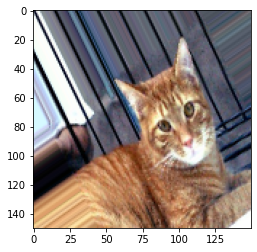

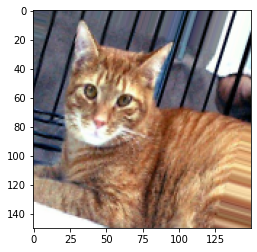

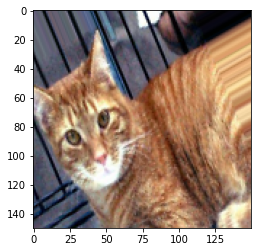

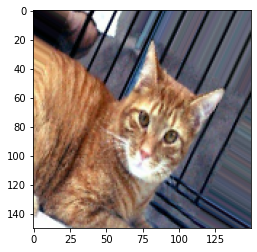

In [22]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# cesitlendirecegimiz resmi sectik
img_path = fnames[6]

# resmi okuyup yeniden boyutlandirdik
img = image.load_img(img_path, target_size=(150, 150))

# resmi numpy dizisine cevirdik (150, 150, 3)
x = image.img_to_array(img)

# sekline getirdik (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# rastgele donusturulmus resim yiginlari olusturur.
#sionsuz dongude olmamasi icin bir yerde durdurmamiz gerekli
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [23]:
#Iletim sonumu ekleyelim
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) #******************
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [24]:
# Veri Cesitlendirme icin tanimlamayi yaptik ve parametreleri yazdik
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

#dogrulama seti cesitlendirlmeyecek o yuzde sadece bouytlandirma paramteresibni giriyoruz
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # hedef data
        train_dir,
        # tuym resimler yeniden bouytlandirilacak
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels   ikili siniflandirma...
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 12000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
100/100 [==============================] - 32s 324ms/step - loss: 0.6920 - acc: 0.5125 - val_loss: 0.6871 - val_acc: 0.5050
Epoch 2/100
100/100 [==============================] - 32s 320ms/step - loss: 0.6825 - acc: 0.5597 - val_loss: 0.6690 - val_acc: 0.5969
Epoch 3/100
100/100 [==============================] - 32s 322ms/step - loss: 0.6718 - acc: 0.5847 - val_loss: 0.6564 - val_acc: 0.6056
Epoch 4/100
100/100 [==============================] - 32s 320ms/step - loss: 0.6676 - acc: 0.6047 - val_loss: 0.6741 - val_acc: 0.5475
Epoch 5/100
100/100 [==============================] - 32s 320ms/step - loss: 0.6600 - acc: 0.5938 - val_loss: 0.6352 - val_acc: 0.6556
Epoch 6/100
100/100 [==============================] - 32s 322ms/step - loss: 0.6425 - acc: 0.6259 - val_loss: 0.6871 - val_acc: 0.5669
Epoch 7/100
100/100 [==

In [29]:
#Egitimin bitisinde modeli kaydetmek iyi bir aliskanliktir
model.save('/content/drive/My Drive/DeepL/cats_and_dogs_best_1.h5')

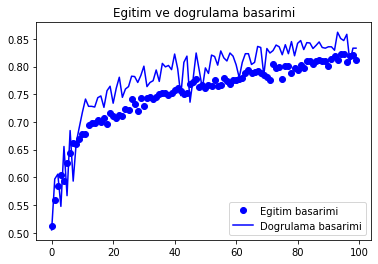

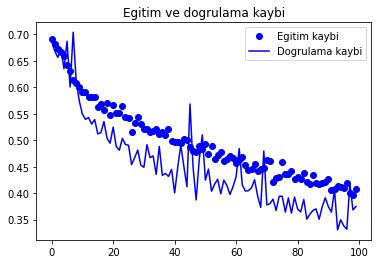

In [25]:
#Egitim kaybini ve basarimini cizdirmek
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Egitim basarimi')
plt.plot(epochs, val_acc, 'b', label='Dogrulama basarimi')
plt.title('Egitim ve dogrulama basarimi')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Egitim kaybi')
plt.plot(epochs, val_loss, 'b', label='Dogrulama kaybi')
plt.title('Egitim ve dogrulama kaybi')
plt.legend()

plt.show()

Modelımıze tahmın etmesı ıcın bazı fotograflar verıyoruz

In [31]:
from keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

model = load_model('/content/drive/My Drive/DeepL/cats_and_dogs_best_1.h5')

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])



images = []
files = glob.glob ("/content/drive/My Drive/DeepL/Veri Arttirma/*.jpg")

for myFile in files:
    
    image = cv2.imread (myFile)
    images.append (image)
    plt.imshow(image)
    
    image = cv2.resize(image,(150,150))
    image = np.reshape(image,[1,150,150,3])
    classes = model.predict_classes(image)
    print(classes)
    if classes == 0 :
      plt.xlabel("Tahminim Kedı")
    if classes == 1 :
      plt.xlabel("Tahminim Kopek")
    plt.show()

Output hidden; open in https://colab.research.google.com to view.